<a href="https://colab.research.google.com/github/IgorB99/aula_robotica/blob/master/Quest%C3%A3o_1_Reconhecimento_de_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#dataset usado no projeto: https://www.kaggle.com/ashishguptajiit/handwritten-az
import pandas as pd
dados = pd.read_csv("handwritten_data_785.csv")

In [46]:
dados_entrada = dados.drop("0", axis=1)
dados_saida = dados["0"]

In [47]:
#rede Neural

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

dados_entrada_treino, dados_entrada_teste, dados_saida_treino, dados_saida_teste = train_test_split(dados_entrada, dados_saida, test_size=0.5, random_state = 42, shuffle=True)

normaliza = StandardScaler()
normaliza = normaliza.fit(dados_entrada_treino)

dados_entrada_treino = normaliza.transform(dados_entrada_treino)
dados_entrada_teste = normaliza.transform(dados_entrada_teste)

clf = MLPClassifier(activation = "logistic", solver = "lbfgs", max_iter = 1000)
clf = clf.fit(dados_entrada_treino, dados_saida_treino)

In [48]:
#teste da rede

from sklearn.metrics import accuracy_score

calculado = clf.predict(dados_entrada_teste)
real = dados_saida_teste.values
print("Calculado: ",calculado[0:5])
print("Saida: ",real[0:5])

print(accuracy_score(real, calculado))

Calculado:  [ 9 17 14 13 25]
Saida:  [ 9 17 14 13 25]
0.9558217171364215


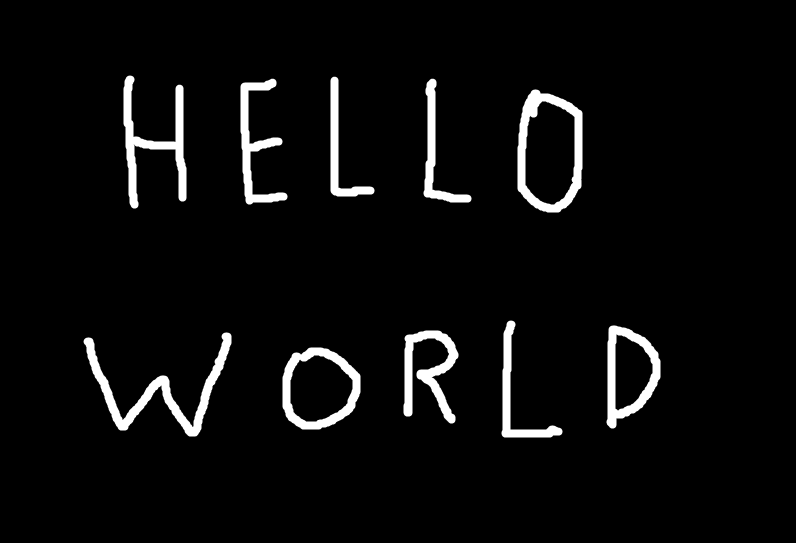

letras encontradas:  ['O', 'W', 'R', 'N', 'E', 'H']


In [67]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#abrir e formatar imagem
img = cv2.imread("hello.png")
altura, largura, pixel = np.shape(img)
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(imgray, 210, 10, 0)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

#identificar a letra 
def cal(x):
  if x == 0:
    resultado = "A"
  elif x == 1:
    resultado = "B"
  elif x == 2:
    resultado = "C"
  elif x == 3:
    resultado = "D"
  elif x == 4:
    resultado = "E"
  elif x == 5:
    resultado = "F"
  elif x == 6:
    resultado = "G"
  elif x == 7:
    resultado = "H"
  elif x == 8:
    resultado = "I"
  elif x == 9:
    resultado = "J"
  elif x == 10:
    resultado = "K"
  elif x == 11:
    resultado = "L"
  elif x == 12:
    resultado = "M"
  elif x == 13:
    resultado = "N"
  elif x == 14:
    resultado = "O"
  elif x == 15:
    resultado = "P"
  elif x == 16:
    resultado = "Q"
  elif x == 17:
    resultado = "R"
  elif x == 18:
    resultado = "S"
  elif x == 19:
    resultado = "T"
  elif x == 20:
    resultado = "U"
  elif x == 21:
    resultado = "V"
  elif x == 22:
    resultado = "W"
  elif x == 23:
    resultado = "X"
  elif x == 24:
    resultado = "Y"
  elif x == 25:
    resultado = "Z"
  return resultado

#encontar as coordenadas de cada letra
def new_image(x):
  listPX = []
  listPY = []

  for py in range(altura):
    for px in range(largura):
      if x[py][px][0] != 0:
        listPX.append(px)
        listPY.append(py)
  
  new_image_black = image_black[(min(listPY) - 50):(max(listPY) + 50), (min(listPX) - 50):(max(listPX) + 50)]
  return new_image_black

letras = []
image_black = np.zeros([altura, largura, 3])

#encontrar contornos, alterar a resolução e encontrar letras 
for contours in contours:
  for py in range(altura):
    for px in range(largura):
      image_black[py][px][0] = 0
      image_black[py][px][1] = 0
      image_black[py][px][2] = 0

  area = cv2.contourArea(contours)
  
  if area > 100:
    cv2.drawContours(image_black, contours, -1, (255, 255, 255), 10)
    new_image_black = new_image(image_black)

    dim = (28, 28)
    image = cv2.resize(new_image_black, dim, interpolation = cv2.INTER_AREA)
    altura28, largura28, pixel = np.shape(image)
    dado = []
    for py in range(altura28):
      for px in range(largura28):
        dado.append(image[py][px][0])
    calculado = clf.predict([dado])
    resultado = cal(calculado)
    if resultado in letras:
      continue
    else:  
      letras.append(resultado)

cv2_imshow(img)
print("letras encontradas: ", letras)